<a href="https://colab.research.google.com/github/aditya-shriwastava/ai-notebooks/blob/master/Faster_RCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

In [88]:
train_data = torchvision.datasets.VOCDetection(
  root="./datasets", year="2012",
  image_set='train', download=True,
  transform = torchvision.transforms.ToTensor()
)
train_loader = DataLoader(train_data, batch_size=1, shuffle=False)

val_data = torchvision.datasets.VOCDetection(
  root="./datasets", year="2012",
  image_set='val', download=True,
  transform = torchvision.transforms.ToTensor()
)
val_loader = DataLoader(val_data, batch_size=1, shuffle=False)

Using downloaded and verified file: ./datasets/VOCtrainval_11-May-2012.tar
Extracting ./datasets/VOCtrainval_11-May-2012.tar to ./datasets
Using downloaded and verified file: ./datasets/VOCtrainval_11-May-2012.tar
Extracting ./datasets/VOCtrainval_11-May-2012.tar to ./datasets


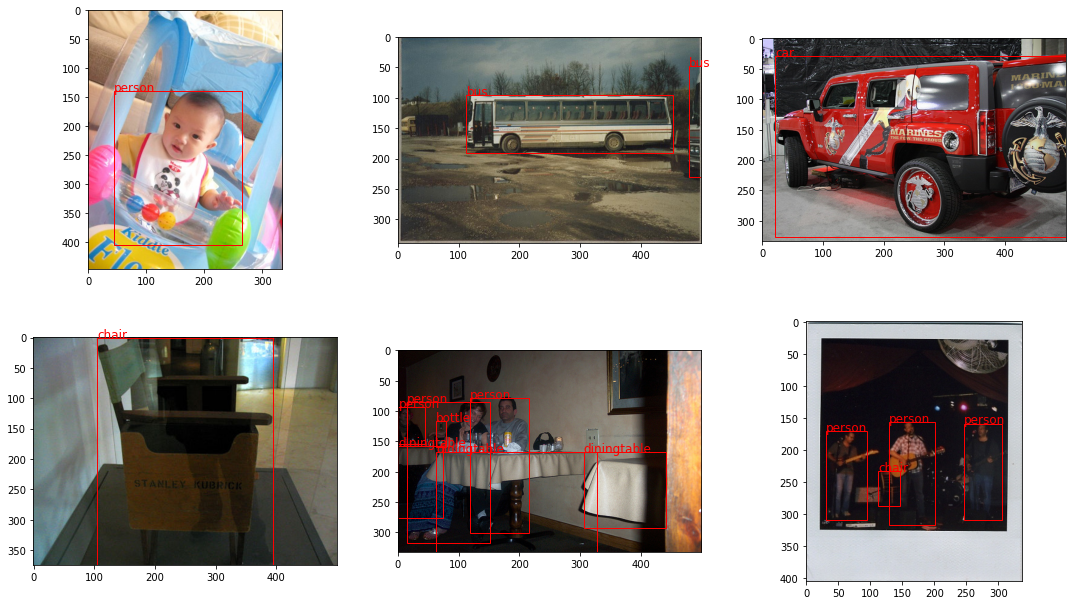

In [89]:
## 1. Randomly sample list of 6 datapoints
datapoints  = np.random.randint(0, len(train_data)-1, 6)
imgs = [torchvision.transforms.ToPILImage()(train_data[i][0]) for i in datapoints]
metadatas = [train_data[i][1] for i in datapoints]

## 2. Display sampled data
fig, axarr = plt.subplots(2,3)
fig.set_size_inches(18.5, 10.5)
for index, (img, metadata) in enumerate(zip(imgs, metadatas)):
  i = index // 3
  j = index - (i * 3)
  axarr[i,j].imshow(imgs[index])
  for obj in metadata['annotation']['object']:
    label = obj['name']
    xmin = int(obj['bndbox']['xmin'])
    ymin = int(obj['bndbox']['ymin'])
    width = int(obj['bndbox']['xmax']) - xmin
    height = int(obj['bndbox']['ymax']) - ymin
    axarr[i,j].add_patch(patches.Rectangle((xmin, ymin), width, height, linewidth=1, edgecolor='r', facecolor='none'))
    axarr[i,j].text(xmin, ymin, label, fontsize = 12, color='red')
plt.show()

In [90]:
class FasterRCNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.resnet50 = torchvision.models.resnet50(pretrained=True)
    self.resnet_base = nn.Sequential(
        self.resnet50.conv1,
        self.resnet50.bn1,
        self.resnet50.relu,
        self.resnet50.maxpool,
        self.resnet50.layer1,
        self.resnet50.layer2,
        self.resnet50.layer3,
        self.resnet50.layer4)
  def forward(self, img):
    return self.resnet_base(img)

In [97]:
model = FasterRCNN()
transform = torchvision.transforms.Compose([
    torchvision.transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

for img, meta in train_loader:
  img = transform(train_data[0][0])
  C,H,W = img.shape
  img = img.reshape(1,C,H,W)
  feature_map = model(img)
  break

In [98]:
print(feature_map.shape)

torch.Size([1, 2048, 14, 16])
